## Decision Trees

Decision trees are versatile and interpretable machine learning models used for both classification and regression tasks. They work by recursively partitioning the input space into regions, assigning a label or value to each region based on the majority class or average target value of the training data within that region. In this section, we'll explore the mathematical formulation of decision trees and delve into two commonly used criteria for splitting nodes: entropy and Gini impurity.

### Mathematical Formulation

A decision tree can be represented as a binary tree, where each internal node represents a decision or test on a feature, each branch corresponds to a possible outcome of the test, and each leaf node holds a class label (in classification) or a predicted value (in regression).

**Decision Tree Algorithm:**

Given training vectors $x_i \in R^n$, i=1,…, l and a label vector $y \in R^l$, a decision tree recursively partitions the feature space such that the samples with the same labels or similar target values are grouped together.
Let the data at node $m$ be represented by (Q_m$ with $n_m$ samples. For each candidate split $\theta = (j, t_m)$ consisting of a feature $j$ and threshold $t_m$, partition the data into $Q_m^{left}(\theta)$ and $Q_m^{right}(\theta)$ subsets

$$
\begin{align*}
\begin{aligned}
    Q_m^{left}(\theta) = \{(x, y) | x_j \leq t_m\}\\Q_m^{right}(\theta) = Q_m \setminus Q_m^{left}(\theta)
\end{aligned}
\end{align*}
$$

The quality of a candidate split of node $m$ is then computed using an impurity function or loss function $H()$, the choice of which depends on the task being solved (classification or regression)
$$
G(Q_m, \theta) = \frac{n_m^{left}}{n_m} H(Q_m^{left}(\theta))
+ \frac{n_m^{right}}{n_m} H(Q_m^{right}(\theta))
$$
Select the parameters that minimises the impurity
$$
\theta^* = \operatorname{argmin}_\theta  G(Q_m, \theta)
$$

The algorithm preceeds recursively for $Q_m^{left}(\theta)$ and $Q_m^{right}(\theta)$ subsets, until  $n_m < \min_{samples}$ or $n_m = 1$.  

Source:  
https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart


## Classification criteria

### Entropy criterion

Entropy is a fundamental concept in information theory and machine learning. It is a measure of uncertainty or impurity in a dataset and is used in various contexts, including decision tree algorithms for classification problems. Entropy can be derived from the notion of information content.

#### Information Content

Information content, denoted as $I(x)$, represents how surprising or informative an event $x$ is. It is inversely proportional to the probability of occurrence of $x$. The less probable an event, the more informative it is. Information content is defined as:

$$
I(x) = -\log(p(x))
$$

Where:
- $I(x)$ is the information content of event $x$.
- $p(x)$ is the probability of event $x$.

#### Entropy or Expected Information Content

In a dataset or probability distribution, we often deal with multiple events. To calculate the expected information content, we take a weighted average of the information content of all possible events. For a discrete random variable $X$ with probability mass function $p(x)$, the expected information content is:

$$
H(X) = -\sum_{x} p(x) \log(p(x))
$$

Where:
- $H(X)$ is the expected information content or entropy of random variable $X$.
- The summation is taken over all possible events $x$.

Entropy reaches its maximum when all events are equally likely ($p(x) = \frac{1}{N}$, where $N$ is the number of events), indicating maximum uncertainty. Conversely, entropy is minimum (0) when one event is certain to occur ($p(x) = 1$) and all others have zero probability, indicating no uncertainty.


#### Entropy Criterion for Decision Trees:  

For a split $m$, assuming the target outcome taking classes $0, 1, \ldots, K-1$ the probability of each class $k$ is:
$$
p_{mk} = \frac{1}{n_m} \sum_{y \in Q_m} I(y = k)
$$

namely a proportion of $k$ class observations in the node $m$.

Then Entropy criterion is:

$$
H(Q_m) = -\sum_{k} p_{mk} \log(p_{mk})
$$


#### Note on Information Gain:

The information gain (IG) is used to evaluate the quality of a split based on entropy. Given a set $Q_m$ of samples, and a split of $Q_m$ into subsets $Q_{m}^{left}, Q_{m}^{right}$, the information gain is defined as:

$$
IG(Q_m, \theta) = H(Q_m) - \left( \frac{n_m^{left}}{n_m} H(Q_m^{left}(\theta))
+ \frac{n_m^{right}}{n_m} H(Q_m^{right}(\theta))\right)
$$

The decision tree algorithm aims to maximize the information gain when choosing the best split at each node.  

As we can see, the quantity $H(Q_m)$ willbe the same for all possible splits of $Q_m$, thus instead of maximizing the quantity $IG(Q_m, \theta)$, we can minimize:

$$\max_{\theta} H(Q_m) - \left( \frac{n_m^{left}}{n_m} H(Q_m^{left}(\theta))
+ \frac{n_m^{right}}{n_m} H(Q_m^{right}(\theta))\right) \equiv \min_{\theta} \frac{n_m^{left}}{n_m} H(Q_m^{left}(\theta))
+ \frac{n_m^{right}}{n_m} H(Q_m^{right}(\theta))$$

### Gini criterion

For a split $m$, assuming the target outcome taking classes $0, 1, \ldots, K-1$ the probability of each class $k$ is:
$$
p_{mk} = \frac{1}{n_m} \sum_{y \in Q_m} I(y = k)
$$

namely a proportion of $k$ class observations in the node $m$.

**Gini Impurity (for classification)**: Measures the probability of misclassifying a randomly chosen element.
   $$H(Q_m) = 1 - \sum_{k} (p_{mk})^2$$
Where $D$ is the dataset, $k$ is the number of classes, and $p_i$ is the proportion of samples in class $i$.

#### Interpretation of Gini criterion

Imagine an experiment with $k$ possible output categories. Category $j$ has a probability of occurrence $p(j|t)$ (where $j=1,\ldots,k$).

Reproduce the experiment two times and make these observations:

1. The probability of obtaining two identical outputs of category $j$ is $p^2(j|t)$.
2. The probability of obtaining two identical outputs, independently of their category, is: $\sum_{j=1}^{k} p^2(j|t)$.
3. The probability of obtaining two different outputs is thus: $1 - \sum_{j=1}^{k} p^2(j|t)$.

That's it: the Gini impurity is simply the probability of obtaining two different outputs, which is an "impurity measure".

https://stats.stackexchange.com/questions/308885/a-simple-clear-explanation-of-the-gini-impurity

## Regression Criteria

When dealing with a continuous target value in a node, there are standard criteria used to minimize the error and decide where to make future splits. These criteria include Mean Squared Error (MSE or L2 error), and Mean Absolute Error (MAE or L1 error).

### Mean Squared Error:
$$
\begin{align}
\begin{aligned}
\bar{y}_m = \frac{1}{n_m} \sum_{y \in Q_m} y\\
H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} (y - \bar{y}_m)^2
\end{aligned}
\end{align}
$$

### Mean Absolute Error:
$$
\begin{align}
\begin{aligned}
median(y)_m = \underset{y \in Q_m}{\mathrm{median}}(y)\\H(Q_m) = \frac{1}{n_m} \sum_{y \in Q_m} |y - median(y)_m|
\end{aligned}
\end{align}
$$

**ID3 (Iterative Dichotomiser 3):**
- **Algorithm:**
  1. Begin with the entire dataset as the root node.
  2. For each attribute, calculate the entropy (a measure of impurity) or the information gain when splitting the data based on that attribute.
  3. Choose the attribute that provides the highest information gain or lowest entropy as the splitting criterion for the current node.
  4. Create child nodes for each unique value of the chosen attribute and divide the data accordingly.
  5. Recursively apply the same process to each child node until one of the stopping conditions is met, such as reaching a maximum depth or having all data in a node belong to the same class.
  6. Assign the majority class of the data in a leaf node as the class label for that leaf.
- **Pros:**
  - Simple to understand and implement.
  - Generates interpretable trees.
  - Suitable for categorical attributes.
- **Cons:**
  - Prone to overfitting when the tree becomes too deep.
  - Not well-suited for continuous attributes.


**CART (Classification and Regression Trees):**
- **Algorithm:**
  - For Classification:
    1. Similar to ID3, CART starts with the entire dataset as the root node.
    2. It calculates the Gini impurity as the measure of impurity for each attribute and chooses the attribute that reduces impurity the most to split the data.
    3. It continues this process recursively until a stopping condition is met.
    4. Assigns class labels to leaf nodes based on majority voting.
  - For Regression:
    1. CART minimizes the sum of squared differences (variance) from the mean for each attribute.
    2. It chooses the attribute that results in the lowest variance when splitting the data.
    3. The process continues until a stopping condition is met.
    4. Assigns the mean value of the target variable to the leaf nodes.
- **Pros:**
  - Versatile as it can handle both classification and regression tasks.
  - Handles both categorical and continuous attributes.
  - Robust against outliers.
- **Cons:**
  - Prone to overfitting when the tree becomes too deep.
  - May generate complex trees.


Let's see the difference between Entropy and Gini impurity criterions on imbalanced dataset:

In [180]:
import numpy as np
from sklearn.datasets import make_classification


def gini_inpurity(y):
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    probabilities = y
    return 1 - np.sum(probabilities**2)


def entropy_inpurity(y):
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    probabilities = y
    return np.sum(-probabilities * np.log2(probabilities, where=(probabilities > 0)))

def split_data(X, y, candidate):
    mask = X <= candidate
    mask = np.squeeze(mask)
    y_l = y[mask]
    y_r = y[~mask]
    n = y.shape[0]
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    return y_l, y_r, n_l, n_r, n

def get_probailities(y):
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    y_bincounts = np.bincount(y, minlength=2)
    y_probability = np.bincount(y, minlength=2)/y.shape[0]
    return y_probability, y_bincounts

def print_split(split_dict, X, y, criterion):
    candidate = split_dict["split"]
    inp_total, inp_l, inp_r, y_l_bincounts, y_r_bincounts = get_inpurity(candidate, y, criterion)
    print(f"Inpurity Total: {inp_total :7.5f} \nLeft classes:  {y_l_bincounts[0] :3d}/{y_l_bincounts[1] :3d} inpurity: {inp_l :7.5f}\n"
          f"Right classes: {y_r_bincounts[0] :3d}/{y_r_bincounts[1] :3d} inpurity: {inp_r :7.5f}\n")

def get_inpurity(candidate, y, criterion, weighted=True):
    y_l, y_r, n_l, n_r, n = split_data(X, y, candidate)
    y_l_proba, y_l_bincounts = get_probailities(y_l)
    y_r_proba, y_r_bincounts = get_probailities(y_r)
    if weighted:
        inp_l = n_l/n*criterion(y_l_proba)
        inp_r = n_r/n*criterion(y_r_proba)
    else:
        inp_l = criterion(y_l_proba)
        inp_r = criterion(y_r_proba)
    inp_total = inp_l + inp_r
    return inp_total, inp_l, inp_r, y_l_bincounts, y_r_bincounts


def one_split(X, y):
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    split_candidates = sorted(np.unique(X))
    gini_best = {"inpurity": float("inf"), "split": None}
    entropy_best = {"inpurity": float("inf"), "split": None}
    for candidate in split_candidates[:-1]:
        gini_inp_total, *_ = get_inpurity(candidate, y, gini_inpurity)
        ent_inp_total, *_ = get_inpurity(candidate, y, entropy_inpurity)
        if gini_inp_total < gini_best["inpurity"]:
            gini_best["inpurity"] = gini_inp_total
            gini_best["split"] = candidate
            # print("best gini")
        if ent_inp_total < entropy_best["inpurity"]:
            entropy_best["inpurity"] = ent_inp_total
            entropy_best["split"] = candidate
            # print("best ent")
    print(f"Total count: {np.bincount(y)}")
    print("==========================")
    print("Best split gini:")
    print_split(gini_best, X, y, gini_inpurity)
    print("Entropy criterion for this split:")
    print_split(gini_best, X, y, entropy_inpurity)
    print("==========================")
    print("Best split entropy:")
    print_split(entropy_best, X, y, entropy_inpurity)
    print("Gini criterion for this split:")
    print_split(entropy_best, X, y, gini_inpurity)
      
           
ys = [[1.0, 0.0], [0.1, 0.9], [0.3, 0.7], [0.01, 0.99,], [0.02, 0.98], [0.5, 0.5]]


X, y = make_classification(n_samples=1000, n_features=1, n_informative=1, 
                            n_redundant=0, n_clusters_per_class=1, 
                            class_sep=0.001, weights=[0.98])
one_split(X, y)


Total count: [975  25]
Best split gini:
Inpurity Total: 0.04785 
Left classes:  974/ 24 inpurity: 0.04685
Right classes:   1/  1 inpurity: 0.00100

Entropy criterion for this split:
Inpurity Total: 0.16528 
Left classes:  974/ 24 inpurity: 0.16328
Right classes:   1/  1 inpurity: 0.00200

Best split entropy:
Inpurity Total: 0.16499 
Left classes:  188/  1 inpurity: 0.00900
Right classes: 787/ 24 inpurity: 0.15599

Gini criterion for this split:
Inpurity Total: 0.04857 
Left classes:  188/  1 inpurity: 0.00199
Right classes: 787/ 24 inpurity: 0.04658



In [ ]:
import numpy as np

def gini_inpurity(y):
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    probabilities = np.bincount(y)/y.shape[0]
    print(f"probabilities: {probabilities}")
    print(f"probabilities squared: {probabilities**2}")
    print(f"gini inpurity: {1 - np.sum(probabilities**2)}")
    return 1 - np.sum(probabilities**2)

def entropy_inpurity(y):
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    probabilities = np.bincount(y)/y.shape[0]
    print(f"probabilities: {probabilities}")
    print(f"log probabilities: { np.log2(probabilities, where=(probabilities > 0))}")
    print(f"p*log_2 p: { probabilities*np.log2(probabilities, where=(probabilities > 0))}")
    print(f"entropy inpurity: {np.sum(-probabilities * np.log2(probabilities, where=(probabilities > 0)))}")
    return np.sum(-probabilities * np.log2(probabilities, where=(probabilities > 0)))

y = [0, 0, 1, 1]
gini_inpurity(y)
print("===================")
entropy_inpurity(y)
print()
y = [0, 0, 1, 1, 1, 1, 1, 1, 1]
gini_inpurity(y)
print("===================")
entropy_inpurity(y)

print()
y = [1, 1, 1, 1, 1, 1, 1]
gini_inpurity(y)
print("===================")
entropy_inpurity(y)

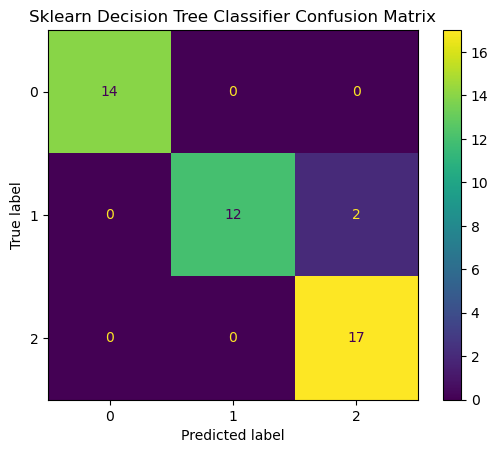

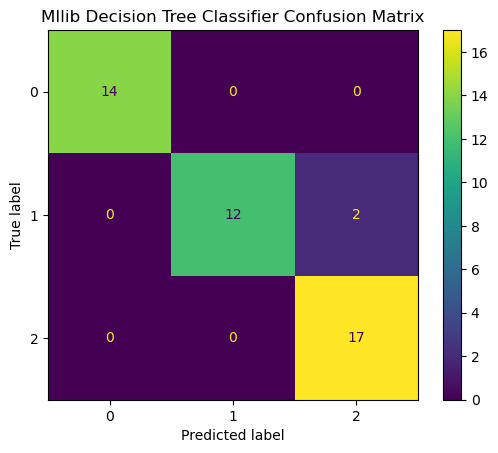

DecisionTreeClassifier()


In [19]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier as SklearnClassifier
from sklearn.tree import  DecisionTreeRegressor as SklearnRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from mllib.decision_tree import DecisionTreeClassifier, DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sk_clf = SklearnClassifier(max_depth=None).fit(X_train, y_train)
sk_clf_pred = sk_clf.predict(X_test)
mllib_clf = DecisionTreeClassifier(max_depth=None).fit(X_train, y_train)
mllib_clf_pred = mllib_clf.predict(X_test)

cm1 = ConfusionMatrixDisplay(confusion_matrix(y_test, sk_clf_pred))
cm1.plot()
plt.title("Sklearn Decision Tree Classifier Confusion Matrix")
plt.show()

cm2 = ConfusionMatrixDisplay(confusion_matrix(y_test, mllib_clf_pred))
cm2.plot()
plt.title("Mllib Decision Tree Classifier Confusion Matrix")
plt.show()

print(sk_clf)
print(mllib_clf)

In [18]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=5, n_informative=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

sk_reg = SklearnRegressor(max_depth=None).fit(X_train, y_train)
sk_reg_pred = sk_reg.predict(X_test)
mllib_reg = DecisionTreeRegressor(max_depth=None).fit(X_train, y_train)
mllib_reg_pred = mllib_reg.predict(X_test)

print(f"Sklearn Decision Tree Regressor MSE: {mean_squared_error(y_test, sk_reg_pred)}")
print(f"Mllib Decision Tree Regressor MSE: {mean_squared_error(y_test, mllib_reg_pred)}")


Sklearn Decision Tree Regressor MSE: 2552.1185761109227
Mllib Decision Tree Regressor MSE: 2478.326801553359


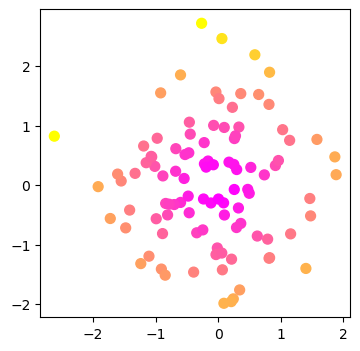

In [28]:
# Source: https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem07-trees.ipynb

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

np.random.seed(42)
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5 # 
plt.figure(figsize=(4, 4))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=50, cmap='spring')
plt.show()


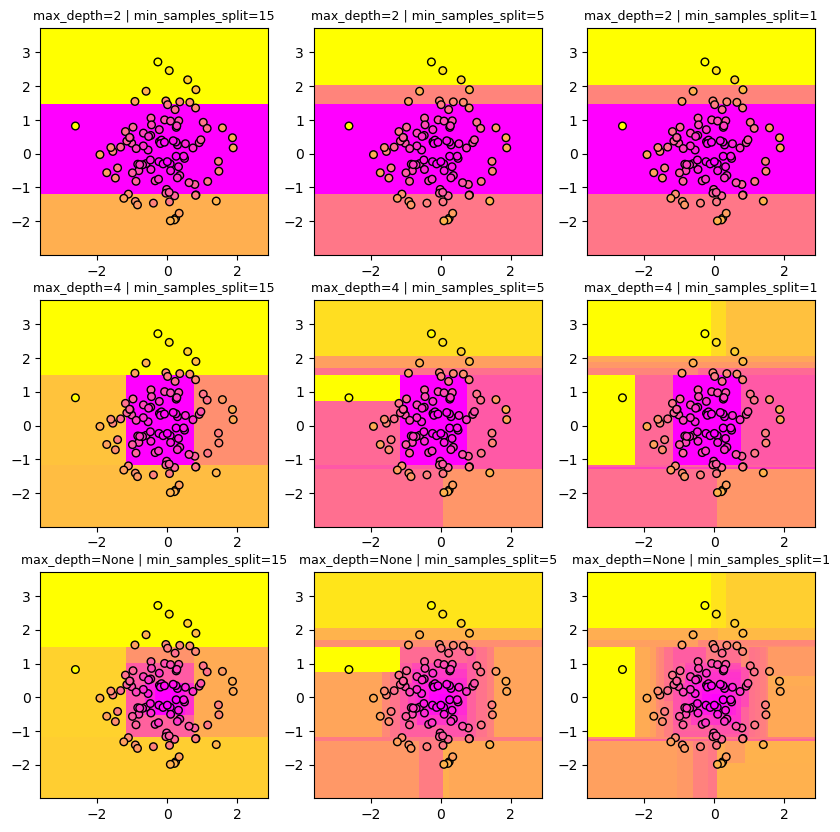

In [32]:
plt.figure(figsize=(10, 10))
for i, max_depth in enumerate([2, 4, None]):
    for j, min_samples_split in enumerate([15, 5, 1]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((3, 3), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring', edgecolor='k')
        plt.title('max_depth=' + str(max_depth) + ' | min_samples_split=' + str(min_samples_split), fontsize=9)